I AM GOING TO FAKE NEWS DETECTION

Here is all the data : "gossipcop_fake.csv" "gossipcop_real.csv" "politifact_fake.csv" "politifact_real.csv"

Data loading

Load the data from the four CSV files into separate pandas DataFrames.

In [1]:
#importing all the necessary libraies
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Download necessary NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
politifact_fake = pd.read_csv('politifact_fake.csv')
politifact_real = pd.read_csv('politifact_real.csv')
gossipcop_fake = pd.read_csv('gossipcop_fake.csv')
gossipcop_real = pd.read_csv('gossipcop_real.csv')

In [4]:
politifact_fake.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [5]:
politifact_real.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [6]:
gossipcop_fake.head()

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [7]:
gossipcop_real

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...
...,...,...,...,...
16812,gossipcop-891749,https://omgcheckitout.com/2017-hollywood-film-...,2017 Hollywood Film Awards: The Complete List ...,927385466357260288\t927386601034010625\t927387...
16813,gossipcop-941486,https://pagesix.com/2018/06/04/jada-pinkett-sm...,Jada Pinkett Smith explains why son Jaden move...,1004044947006386178\t1004045964401889285\t1004...
16814,gossipcop-953143,https://www.etonline.com/tinsley-mortimer-reac...,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1019924845889572864\t1019925702676709377\t1019...
16815,gossipcop-954366,https://www.healthbreakingnews.net/2018/07/pri...,Prince Harry Carries on Princess Diana’s Legac...,1021766291139584000\t1021772054599802880\t1021...


In [8]:
gossipcop_fake.tail()

,id,news_url,title,tweet_ids
5318,gossipcop-6702260693,www.huffingtonpost.com/2012/09/11/september-11...,September 11: Celebrities Remember 9/11 (TWEETS),245643768638894080
5319,gossipcop-6051845337,www.dailymail.co.uk/news/article-4915674/NASCA...,NASCAR owners threaten to fire drivers who pro...,912048333413330944\t912048571482087424\t912049...
5320,gossipcop-2435526162,www.telegraph.co.uk/men/the-filter/7-signs-dav...,The 7 signs that David Beckham is definitely h...,897794716447539200\t897804460830928896\t897842...
5321,gossipcop-4576152851,www.vanityfair.com/style/2016/09/ryan-gosling-...,Ryan Gosling and Eva Mendes Did Not Get Marrie...,778678901572710400\t778681718714740736\t778683...
5322,gossipcop-919334865,www.lifeandstylemag.com/posts/jamie-foxx-katie...,Jamie Foxx Spends the Day With Katie Holmes an...,913137595424608258\t913139996059717632\t913146...


In [9]:
gossipcop_real.tail()

,id,news_url,title,tweet_ids
16812,gossipcop-891749,https://omgcheckitout.com/2017-hollywood-film-...,2017 Hollywood Film Awards: The Complete List ...,927385466357260288\t927386601034010625\t927387...
16813,gossipcop-941486,https://pagesix.com/2018/06/04/jada-pinkett-sm...,Jada Pinkett Smith explains why son Jaden move...,1004044947006386178\t1004045964401889285\t1004...
16814,gossipcop-953143,https://www.etonline.com/tinsley-mortimer-reac...,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1019924845889572864\t1019925702676709377\t1019...
16815,gossipcop-954366,https://www.healthbreakingnews.net/2018/07/pri...,Prince Harry Carries on Princess Diana’s Legac...,1021766291139584000\t1021772054599802880\t1021...
16816,gossipcop-877062,https://www.cosmopolitan.com/uk/entertainment/...,Kylie Jenner is actually terrified of butterflies,NaN


In [10]:
politifact_fake.tail()

,id,news_url,title,tweet_ids
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...
431,politifact15030,https://theglobalheadlines.net/breaking-intel-...,Account Suspended,934217740692443136\t934217839816445952\t934217...


In [11]:
politifact_real.tail()

,id,news_url,title,tweet_ids
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874
623,politifact52,https://web.archive.org/web/20071102131244/htt...,Interest Group Ratings,1002208963239337984\t1024651239697666048


Combine the Datasets:
To start, we need to load the four CSV files: politifact_fake.csv, politifact_real.csv, gossipcop_fake.csv, and gossipcop_real.csv. Each file contains news articles with titles, URLs, and associated X post IDs, labeled as fake or real based on the file name. Assign labels: 0 for fake news (from the fake files) and 1 for real news (from the real files). Extract only the title and label columns, then combine them into a single dataset.
    

In [12]:
import pandas as pd

# Load and label the datasets
politifact_fake = pd.read_csv('politifact_fake.csv').assign(label=0)[['title', 'label']]
politifact_real = pd.read_csv('politifact_real.csv').assign(label=1)[['title', 'label']]
gossipcop_fake = pd.read_csv('gossipcop_fake.csv').assign(label=0)[['title', 'label']]
gossipcop_real = pd.read_csv('gossipcop_real.csv').assign(label=1)[['title', 'label']]

# Combine into one dataset
combined_dataset = pd.concat([politifact_fake, politifact_real, gossipcop_fake, gossipcop_real], ignore_index=True)

# Save the combined dataset
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [13]:
combined_dataset = combined_dataset.dropna(subset=['title'])

In [14]:
combined_dataset.head(10)

,title,label
0,BREAKING: First NFL Team Declares Bankruptcy O...,0
1,Court Orders Obama To Pay $400 Million In Rest...,0
2,UPDATE: Second Roy Moore Accuser Works For Mic...,0
3,Oscar Pistorius Attempts To Commit Suicide,0
4,Trump Votes For Death Penalty For Being Gay,0
5,Putin says: ‘Pope Francis Is Not A Man Of God’...,0
6,New York Man Wanted For Infecting 240 Men And ...,0
7,Saudi Arabia to Behead 6 School Girls for Bein...,0
8,Malia Obama Fired From Cushy Internship At Spa...,0
9,Target to Discontinue Sale of Holy Bible,0


In [15]:
combined_dataset.describe()

,label
count,23196.000000
mean,0.751897
std,0.431921
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
combined_dataset.isnull().sum()

title    0
label    0
dtype: int64

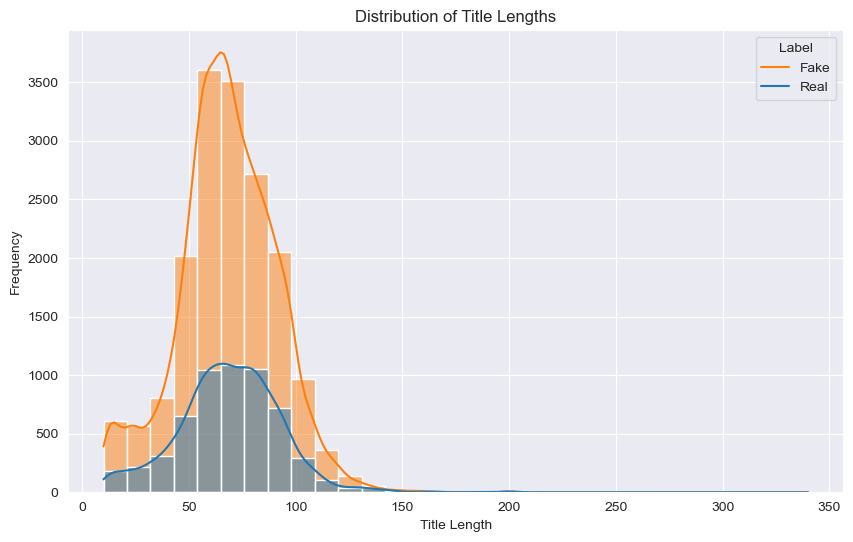

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_dataset['title_length'] = combined_dataset['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_dataset, x='title_length', hue='label', bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Fake', 'Real'])
plt.show()



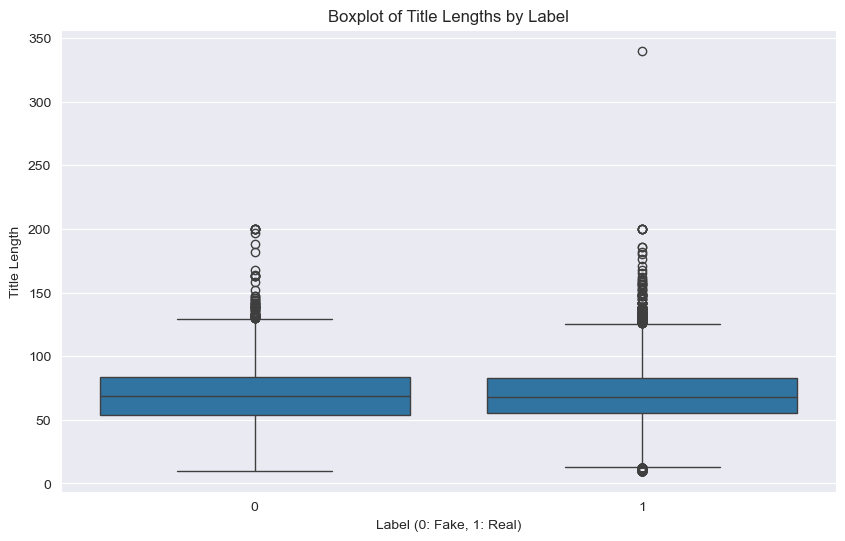

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='title_length', data=combined_dataset)
plt.title('Boxplot of Title Lengths by Label')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Title Length')
plt.show()

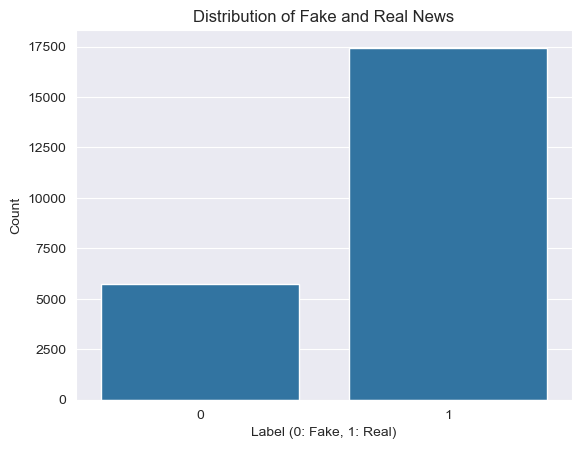

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=combined_dataset)
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Count')
plt.show()

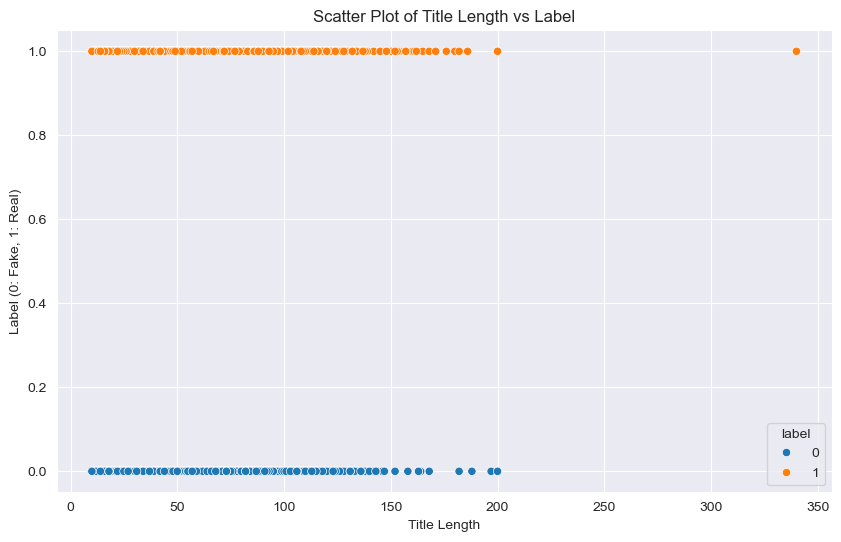

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_dataset, x='title_length', y='label', hue='label')
plt.title('Scatter Plot of Title Length vs Label')
plt.xlabel('Title Length')
plt.ylabel('Label (0: Fake, 1: Real)')
plt.show()

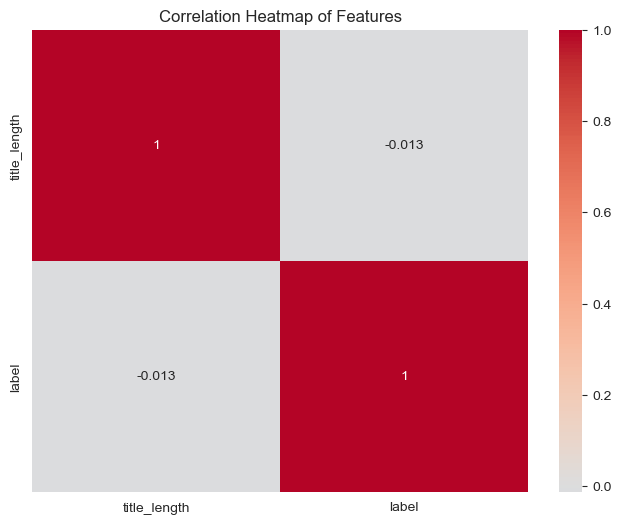

In [21]:
import numpy as np
corr_matrix = combined_dataset[['title_length', 'label']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

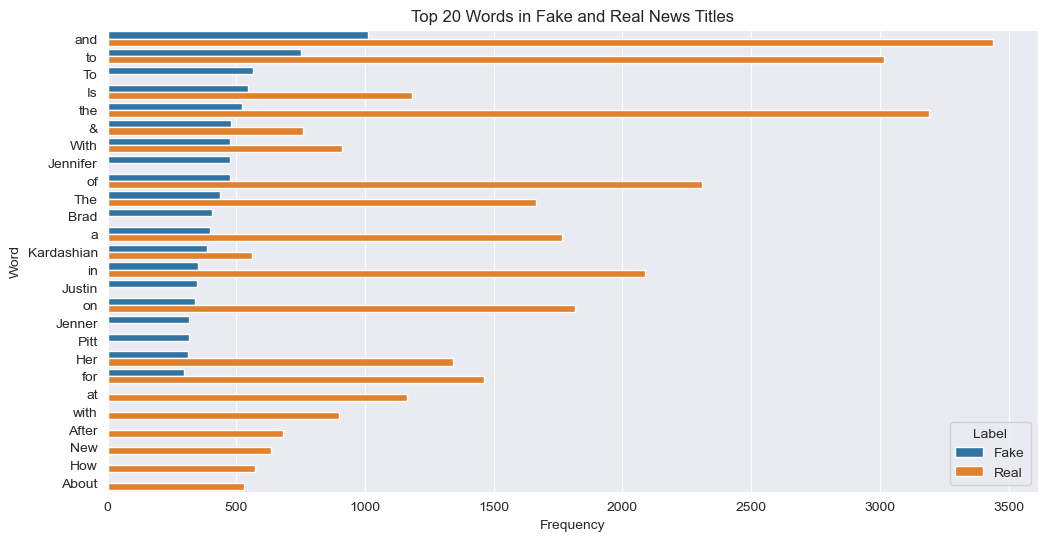

In [22]:
from collections import Counter

fake_words = ' '.join(combined_dataset[combined_dataset['label'] == 0]['title']).split()
real_words = ' '.join(combined_dataset[combined_dataset['label'] == 1]['title']).split()
fake_word_freq = Counter(fake_words).most_common(20)
real_word_freq = Counter(real_words).most_common(20)
fake_df = pd.DataFrame(fake_word_freq, columns=['Word', 'Frequency']).assign(Label='Fake')
real_df = pd.DataFrame(real_word_freq, columns=['Word', 'Frequency']).assign(Label='Real')
top_words_df = pd.concat([fake_df, real_df])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', hue='Label', data=top_words_df)
plt.title('Top 20 Words in Fake and Real News Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

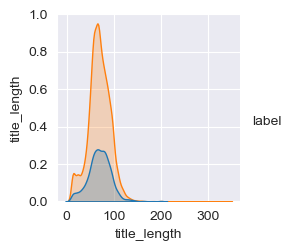

In [23]:
sns.pairplot(combined_dataset, vars=['title_length'], hue='label')
plt.show()

Preprocess the Titles
Text preprocessing is essential to clean and standardize the titles for model training. Perform the following steps:

Lowercase: Convert all text to lowercase for consistency.
Remove Punctuation: Eliminate punctuation to reduce noise.
Remove Stop Words: Exclude common words (e.g., "the," "and") that don’t add meaning.
Tokenization: Split titles into individual words.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply preprocessing
combined_dataset['title'] = combined_dataset['title'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, convert the cleaned titles into numerical features using TF-IDF vectorization, which weights words based on their importance:

In [25]:
# Separate features and labels
X = combined_dataset['title']
y = combined_dataset['label']

# Vectorize the titles
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

Split the Data
Divide the dataset into training (80%) and testing (20%) sets to train the model and evaluate its performance:

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Start with a simple yet effective model like Logistic Regression to classify titles as fake or real:

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate the Model
Assess the model’s performance on the test set using metrics like accuracy, precision, recall, and F1-score:

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred_logreg = model.predict(X_test)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}')
print(classification_report(y_test, y_pred_logreg, target_names=['Fake', 'Real']))

Accuracy: 0.8399
              precision    recall  f1-score   support

        Fake       0.81      0.48      0.60      1166
        Real       0.85      0.96      0.90      3474

    accuracy                           0.84      4640
   macro avg       0.83      0.72      0.75      4640
weighted avg       0.84      0.84      0.82      4640



Check the balance: the dataset has an uneven number of fake and real news articles (e.g., more real than fake), the model might be biased toward the majority class. 

In [29]:
print(combined_dataset['label'].value_counts())

label
1    17441
0     5755
Name: count, dtype: int64


we found imbalanced,then we use SMOTE (Synthetic Minority Oversampling Technique) to balance the classes before splitting:

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_tfidf_balanced, y_balanced = smote.fit_resample(X_tfidf, y)

# Re-split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_balanced, y_balanced, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Accuracy: 0.8446
              precision    recall  f1-score   support

        Fake       0.82      0.88      0.85      3496
        Real       0.87      0.81      0.84      3481

    accuracy                           0.84      6977
   macro avg       0.85      0.84      0.84      6977
weighted avg       0.85      0.84      0.84      6977



In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Accuracy: 0.8446
              precision    recall  f1-score   support

        Fake       0.82      0.88      0.85      3496
        Real       0.87      0.81      0.84      3481

    accuracy                           0.84      6977
   macro avg       0.85      0.84      0.84      6977
weighted avg       0.85      0.84      0.84      6977



Naive Bayes:
Naive Bayes is a simple, probabilistic classifier that works well for text data, making it a great baseline for fake news detection.

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb, target_names=['Fake', 'Real']))

Naive Bayes Results
Accuracy: 0.8188
              precision    recall  f1-score   support

        Fake       0.81      0.83      0.82      3496
        Real       0.82      0.81      0.82      3481

    accuracy                           0.82      6977
   macro avg       0.82      0.82      0.82      6977
weighted avg       0.82      0.82      0.82      6977



Support Vector Machine (SVM):
SVM is a robust classifier that excels in high-dimensional spaces, like TF-IDF vectors, by finding the best boundary between classes.

In [35]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=['Fake', 'Real']))

SVM Results
Accuracy: 0.8481
              precision    recall  f1-score   support

        Fake       0.82      0.89      0.86      3496
        Real       0.88      0.80      0.84      3481

    accuracy                           0.85      6977
   macro avg       0.85      0.85      0.85      6977
weighted avg       0.85      0.85      0.85      6977



In [36]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm, target_names=['Fake', 'Real']))

SVM Results
Accuracy: 0.8481
              precision    recall  f1-score   support

        Fake       0.82      0.89      0.86      3496
        Real       0.88      0.80      0.84      3481

    accuracy                           0.85      6977
   macro avg       0.85      0.85      0.85      6977
weighted avg       0.85      0.85      0.85      6977



Random Forest:
Random Forest is an ensemble method that combines multiple decision trees, making it less prone to overfitting and good at capturing complex patterns.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Fake', 'Real']))

Random Forest Results
Accuracy: 0.8783
              precision    recall  f1-score   support

        Fake       0.84      0.93      0.88      3496
        Real       0.92      0.83      0.87      3481

    accuracy                           0.88      6977
   macro avg       0.88      0.88      0.88      6977
weighted avg       0.88      0.88      0.88      6977



Gradient Boosting Machines (GBM) with XGBoost
Gradient Boosting builds trees sequentially to correct errors, often achieving top performance.

In [38]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb, target_names=['Fake', 'Real']))

C:\Users\LEGION\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:45:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.8157
              precision    recall  f1-score   support

        Fake       0.89      0.72      0.80      3496
        Real       0.76      0.91      0.83      3481

    accuracy                           0.82      6977
   macro avg       0.83      0.82      0.81      6977
weighted avg       0.83      0.82      0.81      6977



In [39]:
#Hyperparameter Tuning (LogisticRegression)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Initialize grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_macro')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print(classification_report(y_test, y_pred_best, target_names=['Fake', 'Real']))

Best Model Accuracy: 0.8555
              precision    recall  f1-score   support

        Fake       0.83      0.89      0.86      3496
        Real       0.88      0.82      0.85      3481

    accuracy                           0.86      6977
   macro avg       0.86      0.86      0.86      6977
weighted avg       0.86      0.86      0.86      6977



In [40]:
#Hyperparameter Tuning (SVM)
param_grid_svm = {'C': [0.1, 1, 10]}
grid_svm = GridSearchCV(SVC(kernel='linear'), param_grid_svm, cv=5, refit=True)
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

print("\n=== Best SVM ===")
print("Best Parameters:", grid_svm.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_svm):.4f}")
print(classification_report(y_test, y_pred_best_svm, target_names=['Fake', 'Real']))


=== Best SVM ===
Best Parameters: {'C': 10}
Accuracy: 0.8524
              precision    recall  f1-score   support

        Fake       0.83      0.89      0.86      3496
        Real       0.88      0.81      0.85      3481

    accuracy                           0.85      6977
   macro avg       0.85      0.85      0.85      6977
weighted avg       0.85      0.85      0.85      6977



In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

results = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted')
    },
    "Naive Bayes": {
        "accuracy": accuracy_score(y_test, y_pred_nb),
        "precision": precision_score(y_test, y_pred_nb, average='weighted'),
        "recall": recall_score(y_test, y_pred_nb, average='weighted'),
        "f1": f1_score(y_test, y_pred_nb, average='weighted')
    },
    "SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "precision": precision_score(y_test, y_pred_svm, average='weighted'),
        "recall": recall_score(y_test, y_pred_svm, average='weighted'),
        "f1": f1_score(y_test, y_pred_svm, average='weighted')
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf, average='weighted'),
        "recall": recall_score(y_test, y_pred_rf, average='weighted'),
        "f1": f1_score(y_test, y_pred_rf, average='weighted')
    },
    "XGBoost": {
        "accuracy": accuracy_score(y_test, y_pred_xgb),
        "precision": precision_score(y_test, y_pred_xgb, average='weighted'),
        "recall": recall_score(y_test, y_pred_xgb, average='weighted'),
        "f1": f1_score(y_test, y_pred_xgb, average='weighted')
    },
    "Best Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred_best),
        "precision": precision_score(y_test, y_pred_best, average='weighted'),
        "recall": recall_score(y_test, y_pred_best, average='weighted'),
        "f1": f1_score(y_test, y_pred_best, average='weighted')
    },
    "Best SVM": {
        "accuracy": accuracy_score(y_test, y_pred_best_svm),
        "precision": precision_score(y_test, y_pred_best_svm, average='weighted'),
        "recall": recall_score(y_test, y_pred_best_svm, average='weighted'),
        "f1": f1_score(y_test, y_pred_best_svm, average='weighted')
    }
}

df_results = pd.DataFrame(results).T
print(df_results)


                          accuracy  precision    recall        f1
Logistic Regression       0.844632   0.846038  0.844632  0.844461
Naive Bayes               0.818833   0.818904  0.818833  0.818819
SVM                       0.848072   0.851034  0.848072  0.847733
Random Forest             0.878314   0.882430  0.878314  0.877970
XGBoost                   0.815680   0.827839  0.815680  0.814004
Best Logistic Regression  0.855525   0.857310  0.855525  0.855331
Best SVM                  0.852372   0.854731  0.852372  0.852111


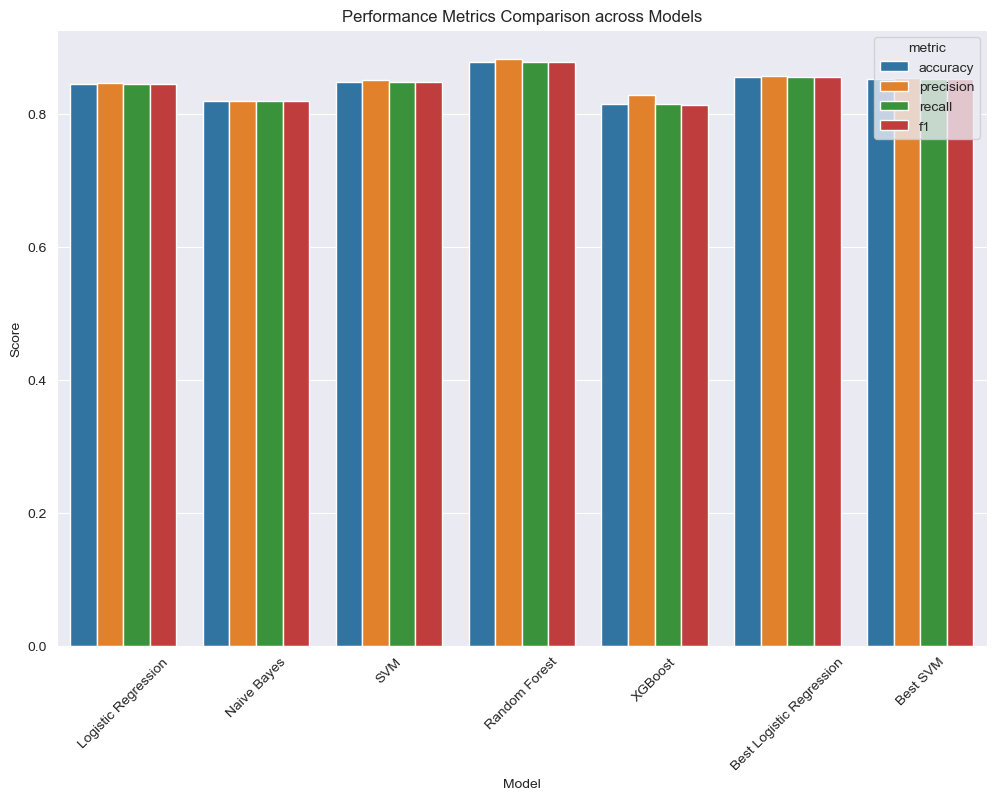

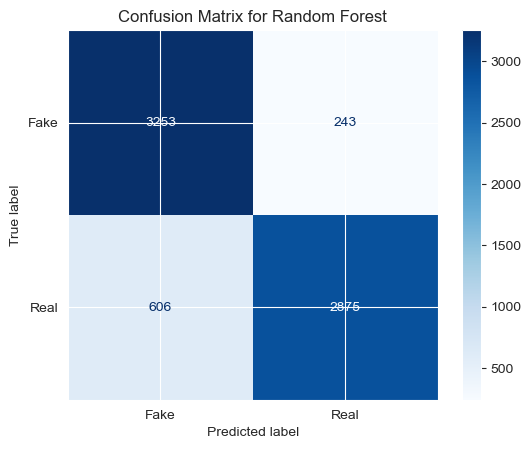

In [42]:
# Import necessary libraries (if not already imported)
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot comparison of models across metrics
df_results_reset = df_results.reset_index().rename(columns={'index': 'model'})
plt.figure(figsize=(12,8))
sns.barplot(x='model', y='score', hue='metric', data=df_results_reset.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1'], var_name='metric', value_name='score'))
plt.title('Performance Metrics Comparison across Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Identify the best model based on F1-score
y_preds = {
    "Logistic Regression": y_pred,
    "Naive Bayes": y_pred_nb,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Best Logistic Regression": y_pred_best,
    "Best SVM": y_pred_best_svm
}

best_model_name = df_results['f1'].idxmax()
y_pred_best = y_preds[best_model_name]

# Plot confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

In [43]:
import joblib

best_model = rf_model
joblib.dump(best_model, "best_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")


['tfidf_vectorizer.joblib']

In [45]:
combined_dataset.shape

(23196, 3)